## Step 0: Download Dataset from Kaggle

To train our image classification model, we need a dataset of images. In this example, we will use the "Massive Indian Food Dataset" available on Kaggle. To download this dataset directly into your Colab environment

In [ ]:
!kaggle datasets download -d anshulmehtakaggl/themassiveindianfooddataset

Dataset URL: https://www.kaggle.com/datasets/anshulmehtakaggl/themassiveindianfooddataset
License(s): CC0-1.0
100% 723M/726M [00:24<00:00, 27.6MB/s]
100% 726M/726M [00:24<00:00, 31.3MB/s]


### Unzip Dataset
# Run this cell to unzip the downloaded dataset


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/themassiveindianfooddataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("/content/"):
    print(f"There are {len(dirnames)} Directories and {len(filenames)} Files in '{dirpath}'")

There are 18 Directories and 1 Files in '/content/'
There are 2 Directories and 7 Files in '/content/.config'
There are 1 Directories and 0 Files in '/content/.config/logs'
There are 0 Directories and 6 Files in '/content/.config/logs/2024.05.30'
There are 0 Directories and 1 Files in '/content/.config/configurations'
There are 1 Directories and 0 Files in '/content/Jalebi-Resize'
There are 0 Directories and 306 Files in '/content/Jalebi-Resize/Jalebi-Resize'
There are 5 Directories and 0 Files in '/content/drive'
There are 0 Directories and 0 Files in '/content/drive/.shortcut-targets-by-id'
There are 10 Directories and 20 Files in '/content/drive/MyDrive'
There are 2 Directories and 17 Files in '/content/drive/MyDrive/Personal data'
There are 0 Directories and 0 Files in '/content/drive/MyDrive/Personal data/Fadi'
There are 0 Directories and 1 Files in '/content/drive/MyDrive/Personal data/Fami'
There are 1 Directories and 6 Files in '/content/drive/MyDrive/New'
There are 0 Directori

In [ ]:
class_name=[]
#data is not named properly so
resize='size'
resized='sized'

In [ ]:
#here taking the class name

for file in os.listdir('/content/'):
  if file.endswith(resize):
    class_name.append(file)
  elif file.endswith(resized):
    class_name.append(file)

In [ ]:
class_name

['Jalebi-Resize',
 'Chole-Bhature-Resized',
 'kathi-resize',
 'dosa_resized',
 'Pav-Bhaji-Resized',
 'Biryani-resize',
 'dabeli-resize',
 'Vadapav-Resized',
 'Kofta-Resized',
 'dhokla-resize',
 'pakora-resize',
 'Paneer-Tikka-resized',
 'Pani-Puri-resize',
 'Naan-Resized',
 'dal_resized']

In [ ]:
#here directory is named incorrectly for panipuri
os.listdir('/content/Pani-Puri-resize')

['resize']

In [ ]:
def copy_images(parent_folder, target_labels,train_ratio=0.7):
    """
    Copies images from `target_labels` classes in `parent_folder` to subdirectories
    named after `dataset` for each target label.

    Args:
        parent_folder (str): Path to the parent folder containing the image dataset.
        dataset (str): "train" or "test" indicating which dataset to copy from.
        target_labels (list): List of target labels (class names) to copy.

    Returns:
        None
    """
    image_paths = []
    for label in target_labels:
      if label not in ['Pani-Puri-resize', 'Biryani-resize']:
        # Create subdirectory if it doesn't exist
        target_dir = os.path.join('INDIAN_FOOD_DS', "train", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        os.makedirs(target_dir, exist_ok=True)  # Handle existing directories gracefully
        os.makedirs(test_dir, exist_ok=True)
        # Get all image paths for the current label within the parent folder
        image_path = [os.path.join(parent_folder, label,label,image)
                       for image in os.listdir(os.path.join(parent_folder,label,label))]
        split_point = int(len(image_path) * train_ratio)
    # except FileNotFoundError:
      elif label == 'Pani-Puri-resize':

        label = 'Pani-Puri-resize'
        target_dir = os.path.join('INDIAN_FOOD_DS', "train", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        os.makedirs(target_dir, exist_ok=True)  # Handle existing directories gracefully
        os.makedirs(test_dir, exist_ok=True)
        # Get all image paths for the current label within the parent folder
        image_path = [os.path.join(parent_folder, label,"resize",image)
                       for image in os.listdir(os.path.join(parent_folder,label,"resize"))]
        split_point = int(len(image_path) * train_ratio)
      elif label == 'Biryani-resize':
        label = 'Biryani-resize'
        target_dir = os.path.join('INDIAN_FOOD_DS', "train", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        os.makedirs(target_dir, exist_ok=True)  # Handle existing directories gracefully
        os.makedirs(test_dir, exist_ok=True)
        # Get all image paths for the current label within the parent folder
        image_path = [os.path.join(parent_folder, label,"resize",image)
                       for image in os.listdir(os.path.join(parent_folder,label,"resize"))]
        split_point = int(len(image_path) * train_ratio)


    # Move images to training and testing folders
      for i, image_path in enumerate(image_path):
          if i < split_point:
           # Move to training data
            new_path = os.path.join(target_dir, os.path.basename(image_path))
            os.rename(image_path, new_path)
          else:
          # Move to testing data
            new_path = os.path.join(test_dir, os.path.basename(image_path))
            os.rename(image_path, new_path)











In [ ]:
copy_images('/content/',class_name)

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/INDIAN_FOOD_DS"):
  print(f"There are {len(dirnames)} Directories and {len(filenames)} Files in '{dirpath}'")

There are 2 Directories and 0 Files in '/content/INDIAN_FOOD_DS'
There are 15 Directories and 0 Files in '/content/INDIAN_FOOD_DS/train'
There are 0 Directories and 214 Files in '/content/INDIAN_FOOD_DS/train/Jalebi-Resize'
There are 0 Directories and 228 Files in '/content/INDIAN_FOOD_DS/train/Chole-Bhature-Resized'
There are 0 Directories and 237 Files in '/content/INDIAN_FOOD_DS/train/kathi-resize'
There are 0 Directories and 118 Files in '/content/INDIAN_FOOD_DS/train/dosa_resized'
There are 0 Directories and 210 Files in '/content/INDIAN_FOOD_DS/train/Pav-Bhaji-Resized'
There are 0 Directories and 160 Files in '/content/INDIAN_FOOD_DS/train/Biryani-resize'
There are 0 Directories and 154 Files in '/content/INDIAN_FOOD_DS/train/dabeli-resize'
There are 0 Directories and 375 Files in '/content/INDIAN_FOOD_DS/train/Vadapav-Resized'
There are 0 Directories and 466 Files in '/content/INDIAN_FOOD_DS/train/Kofta-Resized'
There are 0 Directories and 173 Files in '/content/INDIAN_FOOD_DS/t

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#settting the random seed
tf.random.set_seed(42)

#preprocess data(get all the pixel values in between 1 and 0)
train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)
#setup the traim and test dir
train_dir = "/content/INDIAN_FOOD_DS/train"
test_dir = "/content/INDIAN_FOOD_DS/test"

#import data from directories and turn it into batches

train_data= train_data_gen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)
test_data= test_data_gen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

Found 3331 images belonging to 15 classes.
Found 1439 images belonging to 15 classes.


In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# New: EfficientNetB0 feature vector (version 2)
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

## Build and Train the Model

### Load Pre-trained Model
# Run this cell to load a pre-trained ResNet50 model without the top layer


In [ ]:
base_model=tf.keras.applications.ResNet50(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs,training=False)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

output=tf.keras.layers.Dense(15,activation="softmax")(x)
model_0=tf.keras.Model(inputs,output)
#compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Train Model
history1=model_0.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)),
                    callbacks=[create_tensorboard_callback("indianfood101","efficientnet_model_0")])

94765736/94765736 [==============================] - 3s 0us/step
Shape after base_model: (None, 7, 7, 2048)
After GlobalAveragePooling2D(): (None, 2048)
Saving TensorBoard log files to: indianfood101/efficientnet_model_0/20240601-110449


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
105/105 [==============================] - 37s 265ms/step - loss: 2.6574 - accuracy: 0.1381 - val_loss: 2.5947 - val_accuracy: 0.1619
Epoch 2/5
105/105 [==============================] - 32s 307ms/step - loss: 2.5680 - accuracy: 0.1609 - val_loss: 2.5388 - val_accuracy: 0.1790
Epoch 3/5
105/105 [==============================] - 23s 222ms/step - loss: 2.5207 - accuracy: 0.1699 - val_loss: 2.4997 - val_accuracy: 0.1449
Epoch 4/5
105/105 [==============================] - 25s 236ms/step - loss: 2.4993 - accuracy: 0.1801 - val_loss: 2.4666 - val_accuracy: 0.2017
Epoch 5/5
105/105 [==============================] - 23s 219ms/step - loss: 2.4619 - accuracy: 0.1966 - val_loss: 2.4591 - val_accuracy: 0.1875


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


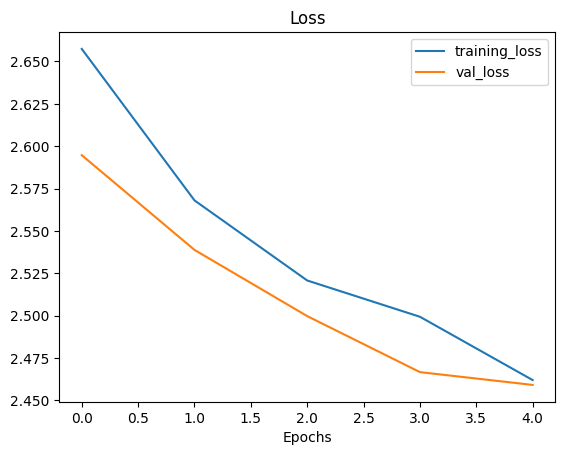

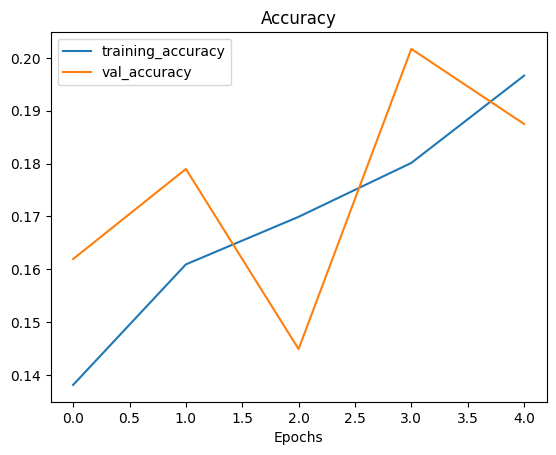

In [ ]:
plot_loss_curves(history1)

In [ ]:
model_0.evaluate(test_data)

45/45 [==============================] - 11s 251ms/step - loss: 2.4534 - accuracy: 0.2071


[2.4534101486206055, 0.20708826184272766]

In [ ]:
#import data from directories and turn it into batches

train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               image_size=(224, 224), # convert all images to be 224 x 224
                                               label_mode="categorical", # type of problem we're working on
                                               seed=42)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time
                                               image_size=(224, 224), # convert all images to be 224 x 224
                                               label_mode="categorical", # type of problem we're working on
                                               seed=42)

Found 3331 files belonging to 15 classes.
Found 1439 files belonging to 15 classes.


In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs,training=False)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

output=tf.keras.layers.Dense(15,activation="softmax")(x)
model_1=tf.keras.Model(inputs,output)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history2=model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)),
                    callbacks=[create_tensorboard_callback("food101","efficientnet_model_1")])

16705208/16705208 [==============================] - 1s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: food101/efficientnet_model_1/20240601-110831
Epoch 1/5
105/105 [==============================] - 38s 264ms/step - loss: 1.3280 - accuracy: 0.6677 - val_loss: 0.7231 - val_accuracy: 0.8068
Epoch 2/5
105/105 [==============================] - 15s 136ms/step - loss: 0.5265 - accuracy: 0.8847 - val_loss: 0.4969 - val_accuracy: 0.8864
Epoch 3/5
105/105 [==============================] - 16s 143ms/step - loss: 0.3657 - accuracy: 0.9225 - val_loss: 0.4085 - val_accuracy: 0.9062
Epoch 4/5
105/105 [==============================] - 15s 136ms/step - loss: 0.2864 - accuracy: 0.9406 - val_loss: 0.3585 - val_accuracy: 0.9006
Epoch 5/5
105/105 [==============================] - 15s 135ms/step - loss: 0.2345 - accuracy: 0.9532 - val_loss: 0.2860 - val_accuracy: 0.9261


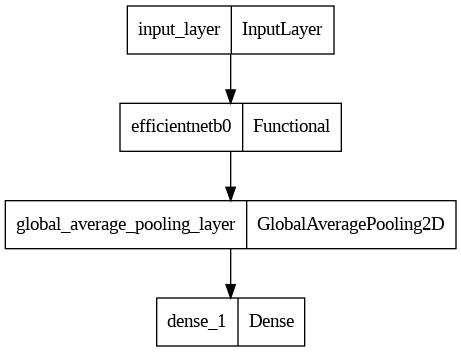

In [ ]:
tf.keras.utils.plot_model(model_1)

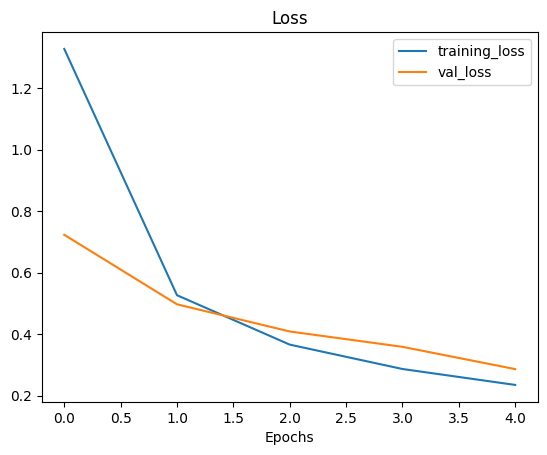

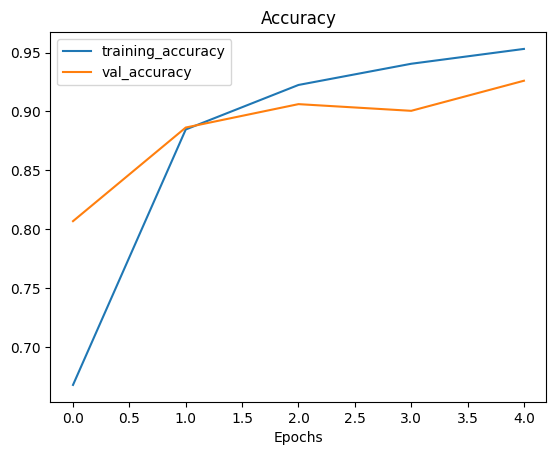

In [ ]:
plot_loss_curves(history2)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

In [ ]:
import matplotlib.pyplot as plt

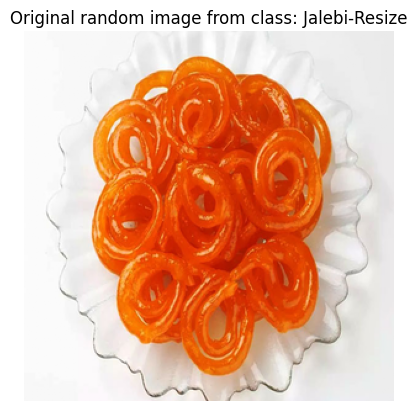

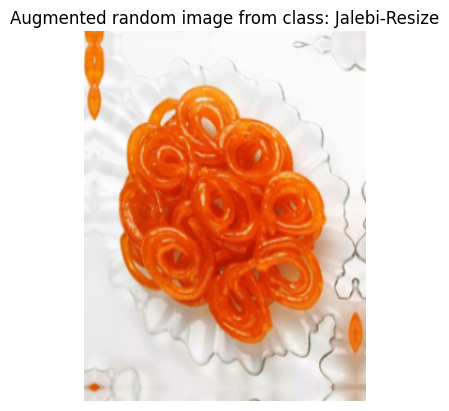

In [ ]:
import random
import matplotlib.image as mpimg
target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "/content/INDIAN_FOOD_DS/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(15, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3= model_2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("food101","resnet_model2")])

24274472/24274472 [==============================] - 1s 0us/step
Saving TensorBoard log files to: food101/resnet_model2/20240601-111023
Epoch 1/5
105/105 [==============================] - 124s 1s/step - loss: 1.6235 - accuracy: 0.5662 - val_loss: 0.8966 - val_accuracy: 0.7500
Epoch 2/5
105/105 [==============================] - 78s 722ms/step - loss: 0.8355 - accuracy: 0.7917 - val_loss: 0.6407 - val_accuracy: 0.8210
Epoch 3/5
105/105 [==============================] - 70s 656ms/step - loss: 0.6342 - accuracy: 0.8442 - val_loss: 0.5214 - val_accuracy: 0.8295
Epoch 4/5
105/105 [==============================] - 61s 562ms/step - loss: 0.5448 - accuracy: 0.8598 - val_loss: 0.4432 - val_accuracy: 0.8580
Epoch 5/5
105/105 [==============================] - 49s 463ms/step - loss: 0.4732 - accuracy: 0.8790 - val_loss: 0.4633 - val_accuracy: 0.8494


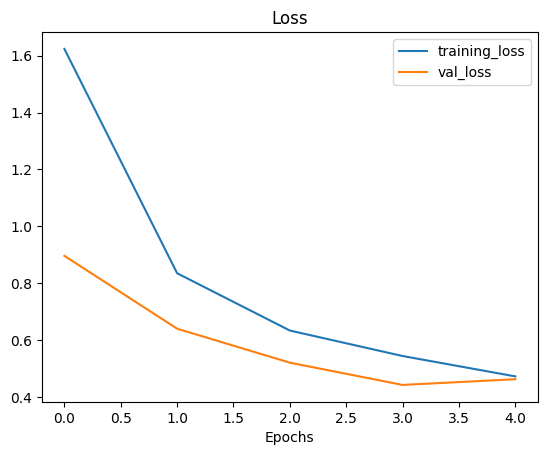

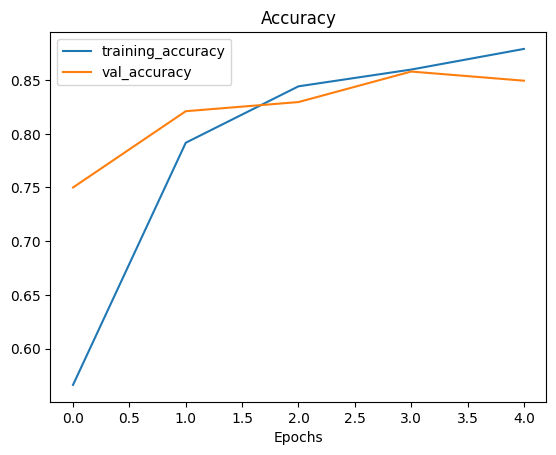

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_2.evaluate(test_data)

45/45 [==============================] - 17s 335ms/step - loss: 0.4049 - accuracy: 0.8742


[0.4048556089401245, 0.874218225479126]

In [ ]:
 #Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=15, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
model_3 = create_base_model()

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_3.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("food101", "efficientnet_model_3"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: food101/efficientnet_model_3/20240601-111804
Epoch 1/5
105/105 [==============================] - ETA: 0s - loss: 1.6192 - accuracy: 0.5500
Epoch 1: val_loss improved from inf to 0.96511, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105 [==============================] - 66s 510ms/step - loss: 1.6192 - accuracy: 0.5500 - val_loss: 0.9651 - val_accuracy: 0.7216
Epoch 2/5
105/105 [==============================] - ETA: 0s - loss: 0.8443 - accuracy: 0.7923
Epoch 2: val_loss improved from 0.96511 to 0.66290, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105 [==============================] - 58s 544ms/step - loss: 0.8443 - accuracy: 0.7923 - val_loss: 0.6629 - val_accuracy: 0.7926
Epoch 3/5
105/105 [==============================] - ETA: 0s - loss: 0.6368 - accuracy: 0.8352
Epoch 3: val_loss improved from 0.66290 to 0.50114, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105

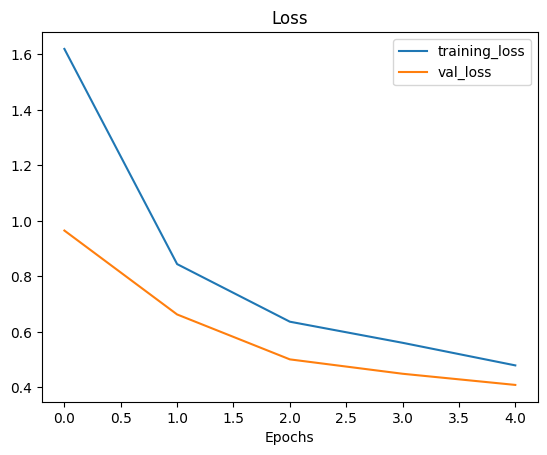

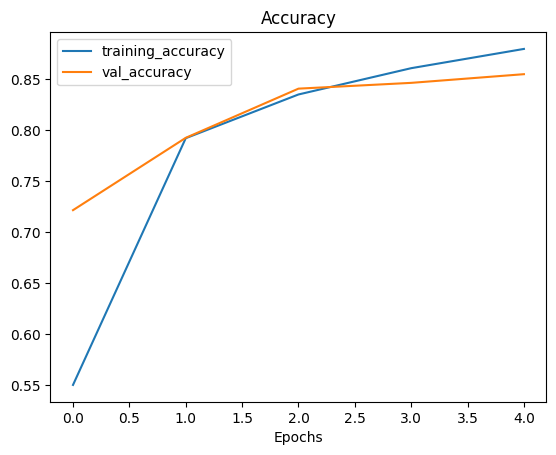

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
model_3.evaluate(test_data)

45/45 [==============================] - 10s 194ms/step - loss: 0.3957 - accuracy: 0.8763


[0.39569351077079773, 0.8763030171394348]

In [ ]:
# Layers in loaded model
model_3.layers

In [ ]:
model_3_baselayer=model_3.layers[2]
model_3_baselayer


In [ ]:
for layer_number, layer in enumerate(model_3_baselayer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
# Make all the layers in model_2_base_model trainable
model_3_baselayer.trainable = True

# Freeze all layers except for the last 10
for layer in model_3_baselayer.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
#Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_finetuned= model_3.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("food101", "resnetmodel3")])

Saving TensorBoard log files to: food101/resnetmodel3/20240601-112348
Epoch 5/10
105/105 [==============================] - 54s 381ms/step - loss: 0.3685 - accuracy: 0.8874 - val_loss: 0.3599 - val_accuracy: 0.8580
Epoch 6/10
105/105 [==============================] - 42s 395ms/step - loss: 0.3033 - accuracy: 0.9054 - val_loss: 0.3420 - val_accuracy: 0.8778
Epoch 7/10
105/105 [==============================] - 43s 398ms/step - loss: 0.2717 - accuracy: 0.9138 - val_loss: 0.2573 - val_accuracy: 0.9062
Epoch 8/10
105/105 [==============================] - 38s 357ms/step - loss: 0.2580 - accuracy: 0.9195 - val_loss: 0.2553 - val_accuracy: 0.9091
Epoch 9/10
105/105 [==============================] - 33s 301ms/step - loss: 0.2363 - accuracy: 0.9270 - val_loss: 0.2635 - val_accuracy: 0.9119
Epoch 10/10
105/105 [==============================] - 33s 307ms/step - loss: 0.2212 - accuracy: 0.9279 - val_loss: 0.2765 - val_accuracy: 0.9062


In [ ]:
model_3.evaluate(test_data)

45/45 [==============================] - 5s 91ms/step - loss: 0.2456 - accuracy: 0.9215


[0.24564652144908905, 0.9214732646942139]

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.5499849915504456, 0.7922545671463013, 0.835184633731842, 0.8610026836395264, 0.8799159526824951, 0.887421190738678, 0.9054337739944458, 0.9138396978378296, 0.9195436835289001, 0.927048921585083, 0.9279495477676392]


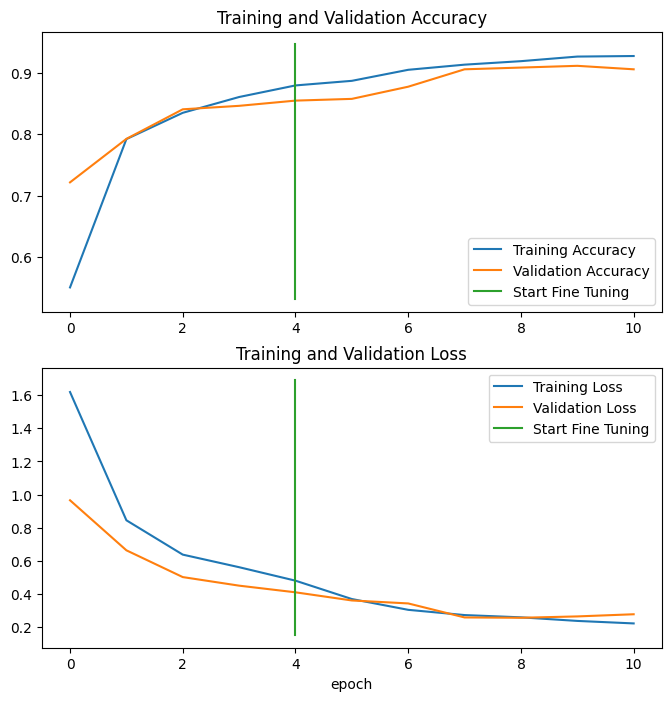

In [ ]:
compare_historys(history_10_percent_data_aug, history_finetuned, initial_epochs=5)

#saving the trained model

In [ ]:
model_save_path = '/content/simple_model.h5'

In [ ]:
model_3.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Check if the file exists
import os
print("File exists:", os.path.exists(model_save_path))

File exists: True


In [ ]:
import h5py

try:
    with h5py.File(model_save_path, 'r') as f:
        print("File is a valid HDF5 file.")
except OSError as e:
    print("Error: File is not a valid HDF5 file.")

File is a valid HDF5 file.


In [ ]:
pred_probs=model_3.predict(test_data,verbose=1)

45/45 [==============================] - 8s 105ms/step


In [ ]:
len(pred_probs)

1439

In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(1439, 15)

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 15
What prediction probability sample 0 looks like:
 [3.5147637e-04 1.1114402e-02 2.8113657e-06 2.2571655e-04 7.1302980e-05
 6.3978208e-05 5.7953489e-03 2.5816879e-01 5.6702606e-02 1.4110300e-03
 1.3240761e-04 1.1230901e-02 6.0954142e-01 4.4295993e-02 8.9188636e-04]
The class with the highest predicted probability by the model for sample 0: 12


In [ ]:
# How do they look?
pred_probs[:10]

array([[3.51476367e-04, 1.11144017e-02, 2.81136568e-06, 2.25716547e-04,
        7.13029804e-05, 6.39782083e-05, 5.79534890e-03, 2.58168787e-01,
        5.67026064e-02, 1.41102995e-03, 1.32407615e-04, 1.12309009e-02,
        6.09541416e-01, 4.42959927e-02, 8.91886360e-04],
       [1.27311583e-08, 7.98331901e-10, 2.25443303e-10, 3.27282379e-07,
        9.99983907e-01, 4.87716960e-08, 2.21843155e-10, 6.81930568e-10,
        8.00105227e-09, 7.94008947e-09, 3.35356437e-10, 6.39558209e-07,
        1.73716188e-08, 1.50468140e-05, 7.41507467e-10],
       [2.45497352e-03, 2.33044138e-05, 4.28822631e-07, 6.41872117e-04,
        5.81726499e-06, 1.73423032e-05, 2.66652623e-05, 2.56928870e-05,
        1.63424629e-04, 1.26930854e-06, 9.49411879e-06, 9.17774378e-05,
        9.90113709e-04, 2.86326394e-04, 9.95261490e-01],
       [1.97070491e-04, 7.57167768e-08, 1.07364251e-08, 1.59609790e-05,
        9.99783456e-01, 1.08855784e-06, 6.61304012e-10, 6.65386253e-08,
        3.13088613e-08, 1.07306761e-0

In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([12,  4, 14,  4, 14,  3,  4,  7, 13,  1])

In [ ]:
# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10]

[4, 7, 13, 10, 8, 4, 10, 3, 2, 8]

In [ ]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

1439

In [ ]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.09242529534398888

In [ ]:
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# Get the class names
class_names = test_data.class_names
class_names[:10]

['Biryani-resize',
 'Chole-Bhature-Resized',
 'Jalebi-Resize',
 'Kofta-Resized',
 'Naan-Resized',
 'Paneer-Tikka-resized',
 'Pani-Puri-resize',
 'Pav-Bhaji-Resized',
 'Vadapav-Resized',
 'dabeli-resize']

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.06      0.06      0.06        69
           1       0.06      0.06      0.06        98
           2       0.10      0.10      0.10        92
           3       0.15      0.17      0.16       201
           4       0.06      0.06      0.06       106
           5       0.08      0.06      0.07        78
           6       0.09      0.07      0.08        54
           7       0.05      0.04      0.04        91
           8       0.16      0.18      0.17       161
           9       0.00      0.00      0.00        66
          10       0.07      0.08      0.07        79
          11       0.08      0.08      0.08        75
          12       0.02      0.02      0.02        52
          13       0.09      0.09      0.09       103
          14       0.08      0.08      0.08       114

    accuracy                           0.09      1439
   macro avg       0.08      0.08      0.08      1439
weighted avg       0.09   

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 28ms/step


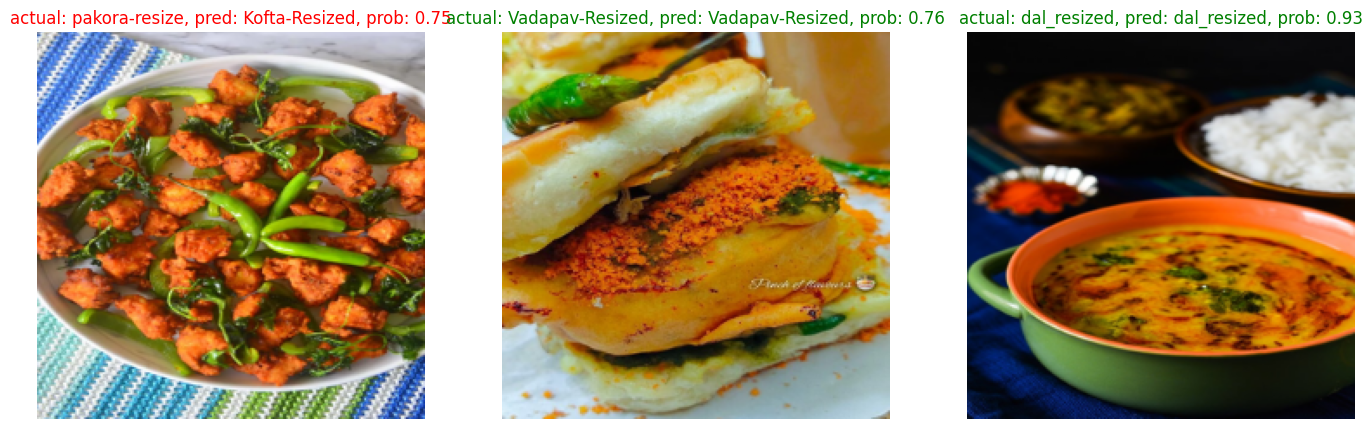

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir +"/"+ class_name + "/" + filename
  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_3.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [ ]:
def predict_image(model,img):
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

In [ ]:
!wget "https://www.dwarakaorganic.com/wp-content/uploads/2021/03/Daal-Fry-1-1024x683.jpg"

--2024-06-01 11:28:42--  https://www.dwarakaorganic.com/wp-content/uploads/2021/03/Daal-Fry-1-1024x683.jpg
Resolving www.dwarakaorganic.com (www.dwarakaorganic.com)... 3.20.98.128
Connecting to www.dwarakaorganic.com (www.dwarakaorganic.com)|3.20.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38180 (37K) [image/jpeg]
Saving to: ‘Daal-Fry-1-1024x683.jpg’

Daal-Fry-1-1024x683 100%[===================>]  37.29K  --.-KB/s    in 0.1s    

2024-06-01 11:28:42 (384 KB/s) - ‘Daal-Fry-1-1024x683.jpg’ saved [38180/38180]



1/1 [==============================] - 0s 128ms/step


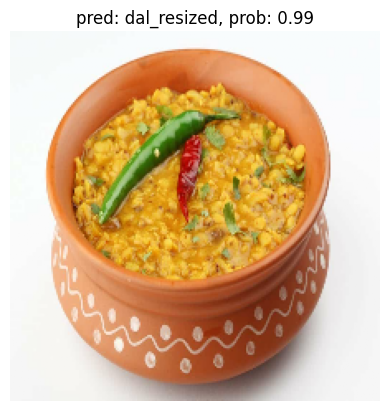

In [ ]:
predict_image(model_3,'Daal-Fry-1-1024x683.jpg')

In [ ]:
!wget "https://www.wikihow.com/images/a/a8/Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg"

--2024-06-01 11:30:20--  https://www.wikihow.com/images/a/a8/Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg
Resolving www.wikihow.com (www.wikihow.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to www.wikihow.com (www.wikihow.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5520296 (5.3M) [image/jpeg]
Saving to: ‘Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg’

Make-Hyderabadi-Veg 100%[===================>]   5.26M  --.-KB/s    in 0.05s   

2024-06-01 11:30:20 (106 MB/s) - ‘Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg’ saved [5520296/5520296]



1/1 [==============================] - 0s 146ms/step


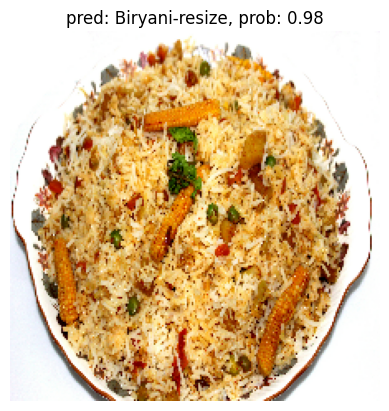

In [ ]:
predict_image(model_3,'Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg')

In [ ]:
import tensorflow as tf
model_save_path = '/content/simple_model.h5'
new_model = tf.keras.models.load_model(model_save_path)

In [ ]:
import h5py

try:
    with h5py.File(model_save_path, 'r') as f:
        print("File is a valid HDF5 file.")
except OSError as e:
    print("Error: File is not a valid HDF5 file.")


# Image Classification Web App with Streamlit

Next comming cells  demonstrates how to create a web application for image classification using Streamlit and TensorFlow. The application allows users to upload an image, preprocess it, and get predictions from a pre-trained model. The notebook also uses ngrok to create a public URL for the Streamlit app.

## Step-by-Step Guide

1. **Load and Preprocess the Image**: The `img_classification.py` script contains functions to load and preprocess images to be compatible with our model.
2. **Build the Streamlit App**: The `app.py` script sets up the Streamlit interface for users to upload images and view predictions.
3. **Expose the App to the Internet**: The ngrok service is used to make the Streamlit app publicly accessible.

Let's dive into the code!

---

### Step 1: Image Preprocessing
We start by defining a function to load and preprocess the image.


In [ ]:
%%writefile img_classification.py

import tensorflow as tf
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
   """
    Reads in an image from filename, turns it into a tensor and reshapes it to (224, 224, 3).

    Parameters
    ----------
    filename (str): string filename of target image
    img_shape (int): size to resize target image to, default is 224
    scale (bool): whether to scale pixel values to range(0, 1), default is True

    Returns
    -------
    Tensor: Image tensor of shape (img_shape, img_shape, 3)
    """
  # Convert the numpy array to a tensor
  img = tf.convert_to_tensor(filename,dtype=tf.float32)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale the image pixel values to the range (0, 1) if scale is True
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

 # List of class names for prediction
class_names = [
    'Biryani', 'Chole-Bhature', 'Jalebi', 'Kofta', 'Naan',
    'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav',
    'Dabeli', 'Dal', 'Dhokla', 'Dosa', 'Kathi', 'Pakora'
]
def predict_data(model, filename, class_names):
  """
    Imports an image located at filename, makes a prediction on it with a trained model,
    and returns the predicted class.

    Parameters
    ----------
    model: Trained TensorFlow/Keras model
    filename (str): Path to the image file
    class_names (list): List of class names corresponding to model output

    Returns
    -------
    str: Predicted class name
    """
  # Load and preprocess the image
  img = load_and_prep_image(filename)

  # Make a prediction on the preprocessed image
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]

  # Get the predicted class with the highest probability
  pred_class = class_names[pred_prob.argmax()]

  return pred_class



### Step 2: Build the Streamlit App

Next, we set up our Streamlit application. This app will allow users to upload an image and receive a prediction from the pre-trained model.

In [ ]:
%%writefile app.py
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import streamlit as st
from img_classification import load_and_prep_image,predict_data
# Load pre-trained model
model_1 = tf.keras.models.load_model('/content/simple_model.h5')

st.title("Your Streamlit App for Machine Learning Predictions")
st.write("Upload an image and get the predicted class.")

# Define class names
class_names = ['Biryani', 'Chole-Bhature', 'Jalebi', 'Kofta', 'Naan', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav', 'Dabeli', 'Dal', 'Dhokla', 'Dosa', 'Kathi', 'Pakora']

# File uploader for user to upload an image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    try:
      # Load and preprocess the image
      data = Image.open(uploaded_file)
      st.image(data, caption='Uploaded pic.', use_column_width=True)

      st.write("")
      st.write("Classifying...")

      img=load_and_prep_image(data)
      predicted_class = predict_data(model_1, img, class_name)


      # Display results
      st.success("Prediction successful!")
      st.write(f"Predicted Class: {predicted_class}")

    except Exception as e:
       st.error(f"An error occurred during prediction: {e}")

### Step 3: Install Required Packages

Before we start building our image classification web app, we need to install a few necessary packages. The `streamlit` package will allow us to create the web interface, and the `pyngrok` package will help us expose our Streamlit app to the internet.

Run the following commands to install these packages:


In [ ]:
# Install Streamlit, a framework to create web apps with minimal effort
!pip -q install streamlit

# Install pyngrok, a package to create public URLs for our web app
!pip -q install pyngrok

### Step 3: Expose the App to the Internet

Finally, we use ngrok to create a public URL for our Streamlit app. This allows anyone with the link to access our app from anywhere.


In [ ]:
from pyngrok import ngrok

# Replace 'your_authtoken_here' with the actual authtoken from your ngrok dashboard
ngrok.set_auth_token('2hAs1L1RwCuYRwcFpa0stbBzHHj_3FAxsTG7CCcUHAxsbCsMn')

# Connect to ngrok on port 80
public_url = ngrok.connect(80)
print('Link to web app:')
print(public_url)

# Run your Streamlit app
!streamlit run --server.port 80 app.py >/dev/null

In [ ]:
from pyngrok import ngrok

# Replace 'your_authtoken_here' with the actual authtoken from your ngrok dashboard
ngrok.set_auth_token('2hAs1L1RwCuYRwcFpa0stbBzHHj_3FAxsTG7CCcUHAxsbCsMn')

# Connect to ngrok on port 80
public_url = ngrok.connect(80)
print('Link to web app:')
print(public_url)

# Run your Streamlit app
!streamlit run --server.port 80 app.py >/dev/null

Link to web app:
NgrokTunnel: "https://bf7f-34-150-148-240.ngrok-free.app" -> "http://localhost:80"
2024-05-31 07:43:55.028819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 07:43:55.028878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 07:43:55.030420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-31 07:43:56.436054: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
